In [ ]:
## CSCI 4150U - Data Mining - Lab 5
# Name: Thinh Le
# Student ID: 100741899

In [1293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import fmean
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [1294]:
headers = ['A1', 'A2', 'A3', 'Class']
train_set = pd.read_csv('datingData_training.txt', header=None, names=headers, delimiter='\t')
test_set = pd.read_csv('datingData_testing.txt', header=None, names=headers, delimiter='\t')

In [1295]:
train_set

A1         A2        A3       Class
0    40920   8.326976  0.953952  largeDoses
1    14488   7.153469  1.673904  smallDoses
2    26052   1.441871  0.805124   didntLike
3    75136  13.147394  0.428964   didntLike
4    38344   1.669788  0.134296   didntLike
..     ...        ...       ...         ...
595  28631   7.661515  0.055981  largeDoses
596  71036   6.353608  1.645301   didntLike
597  71142  10.442780  0.335870   didntLike
598  37653   3.834509  1.346121   didntLike
599  76839  10.998587  0.584555   didntLike

[600 rows x 4 columns]

In [1296]:
test_set

A1         A2        A3       Class
0     9916   2.695935  1.512111  smallDoses
1    38889   3.356646  0.324230   didntLike
2    39075  14.677836  0.793183  largeDoses
3    48071   1.551934  0.130902   didntLike
4     7275   2.464739  0.223502  smallDoses
..     ...        ...       ...         ...
395  11145   3.410627  0.631838  smallDoses
396  68846   9.974715  0.669787   didntLike
397  26575  10.650102  0.866627  largeDoses
398  48111   9.134528  0.728045  largeDoses
399  43757   7.882601  1.332446  largeDoses

[400 rows x 4 columns]

In [1297]:
# Encode categorical data
labelencoder = LabelEncoder()
train_set['Class_N'] = labelencoder.fit_transform(train_set['Class'])
train_set.drop(columns=['Class'], inplace=True)
train_set.rename(columns = {'Class_N':'Class'}, inplace = True)

test_set['Class_N'] = labelencoder.fit_transform(test_set['Class'])
test_set.drop(columns=['Class'], inplace=True)
test_set.rename(columns = {'Class_N':'Class'}, inplace = True)

In [1298]:
train_set

A1         A2        A3  Class
0    40920   8.326976  0.953952      1
1    14488   7.153469  1.673904      2
2    26052   1.441871  0.805124      0
3    75136  13.147394  0.428964      0
4    38344   1.669788  0.134296      0
..     ...        ...       ...    ...
595  28631   7.661515  0.055981      1
596  71036   6.353608  1.645301      0
597  71142  10.442780  0.335870      0
598  37653   3.834509  1.346121      0
599  76839  10.998587  0.584555      0

[600 rows x 4 columns]

In [1299]:
test_set

A1         A2        A3  Class
0     9916   2.695935  1.512111      2
1    38889   3.356646  0.324230      0
2    39075  14.677836  0.793183      1
3    48071   1.551934  0.130902      0
4     7275   2.464739  0.223502      2
..     ...        ...       ...    ...
395  11145   3.410627  0.631838      2
396  68846   9.974715  0.669787      0
397  26575  10.650102  0.866627      1
398  48111   9.134528  0.728045      1
399  43757   7.882601  1.332446      1

[400 rows x 4 columns]

In [1300]:
# Normalize the data
class_col = train_set['Class']
train_set.drop(columns=['Class'], inplace=True)
cols = train_set.columns
scaler = MinMaxScaler()
d = scaler.fit_transform(train_set)
train_set = pd.DataFrame(d, columns=cols)
train_set['Class'] = class_col

class_col = test_set['Class']
test_set.drop(columns=['Class'], inplace=True)
cols = test_set.columns
scaler = MinMaxScaler()
d = scaler.fit_transform(test_set)
test_set = pd.DataFrame(d, columns=cols)
test_set['Class'] = class_col

In [1301]:
train_set

A1        A2        A3  Class
0    0.448325  0.398051  0.562334      1
1    0.158733  0.341955  0.987244      2
2    0.285429  0.068925  0.474496      0
3    0.823201  0.628480  0.252489      0
4    0.420102  0.079820  0.078578      0
..        ...       ...       ...    ...
595  0.313685  0.366241  0.032357      1
596  0.778281  0.303719  0.970363      0
597  0.779442  0.499192  0.197546      0
598  0.412532  0.183300  0.793789      0
599  0.841859  0.525761  0.344318      0

[600 rows x 4 columns]

In [1302]:
test_set

A1        A2        A3  Class
0    0.114390  0.148301  0.891882      2
1    0.448619  0.184646  0.189538      0
2    0.450765  0.807414  0.466810      1
3    0.554542  0.085370  0.075231      0
4    0.083924  0.135583  0.129982      2
..        ...       ...       ...    ...
395  0.128567  0.187615  0.371414      2
396  0.794200  0.548700  0.393851      0
397  0.306566  0.585852  0.510234      1
398  0.555003  0.502482  0.428297      1
399  0.504776  0.433615  0.785654      1

[400 rows x 4 columns]

In [1303]:
Y_train = train_set['Class']
X_train = train_set.drop(columns=['Class'])
Y_test = test_set['Class']
X_test = test_set.drop(columns=['Class'])

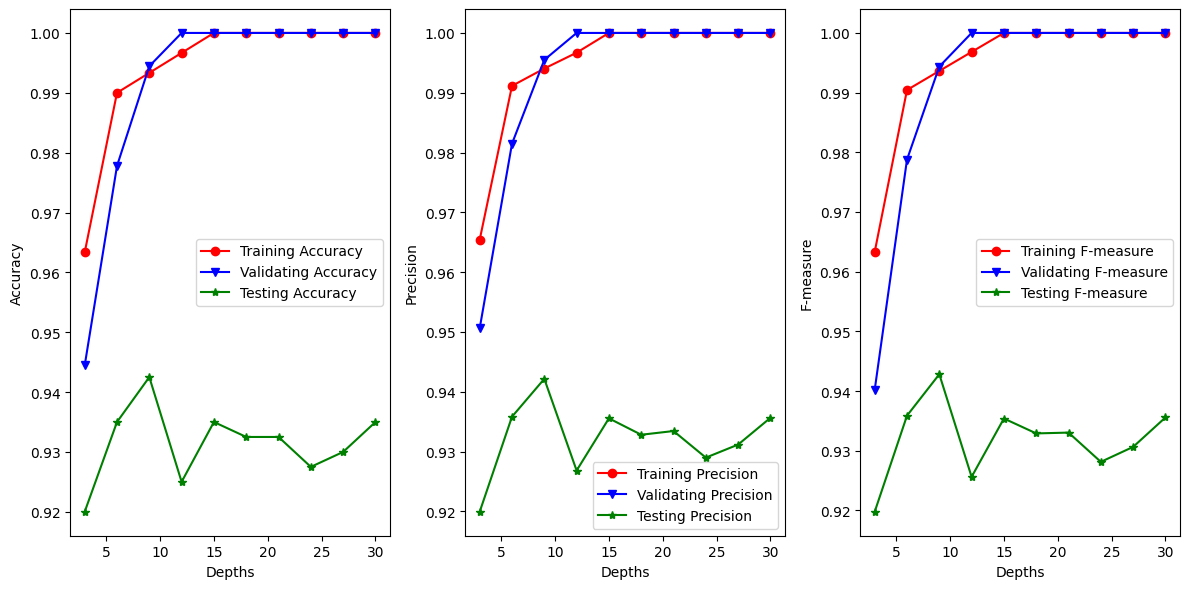

In [1373]:
# Decision Tree Model
depths = []
for i in range(3, 31, 3):
    depths.append(i)

trainAcc, trainPre, trainFm = [], [], []
valAcc, valPre, valFm =  [], [], []
testAcc, testPre, testFm = [], [], []

for depth in depths:
    # Training the model
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
    clf = clf.fit(X_train, Y_train)
    # Validate the model on training set
    Y_train_pred = clf.predict(X_train)
    trainAcc.append(accuracy_score(Y_train, Y_train_pred))
    trainPre.append(precision_score(Y_train, Y_train_pred, average='macro'))
    trainFm.append(f1_score(Y_train, Y_train_pred, average='macro'))

    Y_val_pred = clf.predict(X_val)
    valAcc.append(accuracy_score(Y_val, Y_val_pred))
    valPre.append(precision_score(Y_val, Y_val_pred, average='macro'))
    valFm.append(f1_score(Y_val, Y_val_pred, average='macro'))
    # Evaluate the model on the testing set
    Y_test_pred = clf.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_test_pred))
    testPre.append(precision_score(Y_test, Y_test_pred, average='macro'))
    testFm.append(f1_score(Y_test, Y_test_pred, average='macro'))

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.plot(depths, trainAcc, 'ro-', depths, valAcc, 'bv-' , depths, testAcc, 'g*-')
ax1.legend(['Training Accuracy', 'Validating Accuracy', 'Testing Accuracy'])
ax1.set_xlabel('Depths')
ax1.set_ylabel('Accuracy')

ax2.plot(depths, trainPre, 'ro-', depths, valPre, 'bv-', depths, testPre, 'g*-')
ax2.legend(['Training Precision', 'Validating Precision', 'Testing Precision'])
ax2.set_xlabel('Depths')
ax2.set_ylabel('Precision')

ax3.plot(depths, trainFm, 'ro-', depths, valFm, 'bv-', depths, testFm, 'g*-')
ax3.legend(['Training F-measure', 'Validating F-measure', 'Testing F-measure'])
ax3.set_xlabel('Depths')
ax3.set_ylabel('F-measure')

plt.tight_layout()
plt.show()

In [ ]:
# Decision Tree model gives a very high accuracy on the training and validation set,
#   from 96% up to 100% accuracy, with max depths from 3 to 30.
# This model also gives a pretty high accuracy, maximum at around 94-95% on the testing set
# We also need to consider overfitting. We can see that training and validation set reaches 
#   100% accuracy at around depth = 12.
# Therefore, the ideal depth should be around 5 to 10.
# We also choose Gini as the impurity measure. Although Entropy gives a slightly higher results,
#   but Gini gives a much more efficient performance (less compute time).

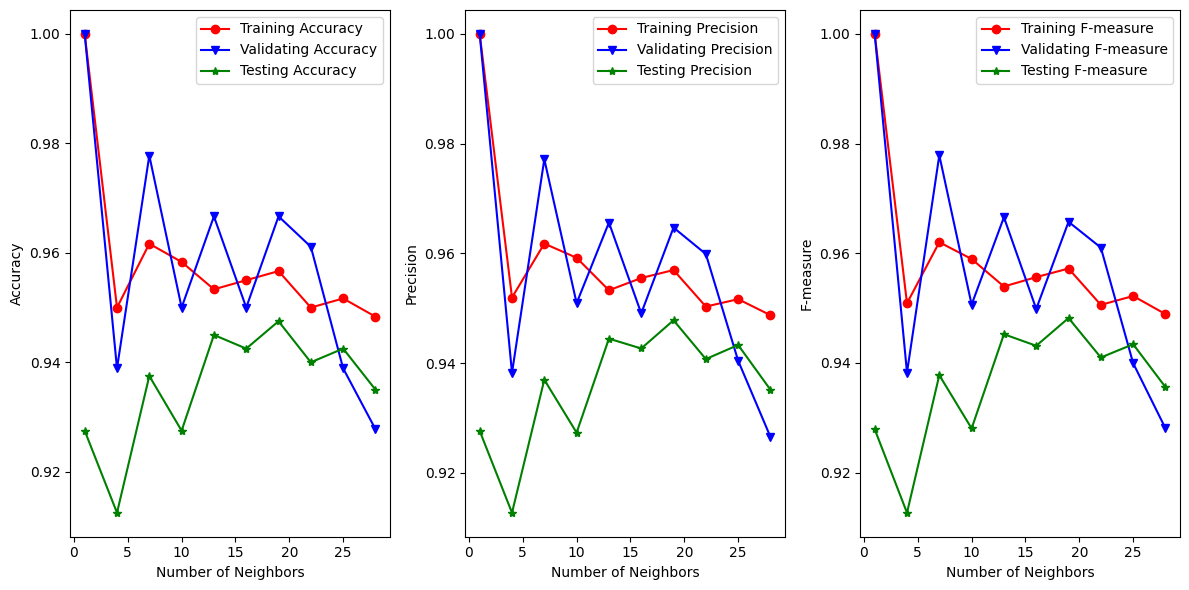

In [1339]:
# KNN Model
numK = []
for i in range(1, 31, 3):
    numK.append(i)

trainAcc, trainPre, trainFm = [], [], []
valAcc, valPre, valFm =  [], [], []
testAcc, testPre, testFm = [], [], []

for k in numK:
    # Training the model
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
    clf = clf.fit(X_train, Y_train)
    # Validate the model on training set
    Y_train_pred = clf.predict(X_train)
    trainAcc.append(accuracy_score(Y_train, Y_train_pred))
    trainPre.append(precision_score(Y_train, Y_train_pred, average='macro'))
    trainFm.append(f1_score(Y_train, Y_train_pred, average='macro'))

    Y_val_pred = clf.predict(X_val)
    valAcc.append(accuracy_score(Y_val, Y_val_pred))
    valPre.append(precision_score(Y_val, Y_val_pred, average='macro'))
    valFm.append(f1_score(Y_val, Y_val_pred, average='macro'))
    # Evaluate the model on the testing set
    Y_test_pred = clf.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_test_pred))
    testPre.append(precision_score(Y_test, Y_test_pred, average='macro'))
    testFm.append(f1_score(Y_test, Y_test_pred, average='macro'))

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.plot(numK, trainAcc, 'ro-', numK, valAcc, 'bv-' , numK, testAcc, 'g*-')
ax1.legend(['Training Accuracy', 'Validating Accuracy', 'Testing Accuracy'])
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Accuracy')

ax2.plot(numK, trainPre, 'ro-', numK, valPre, 'bv-', numK, testPre, 'g*-')
ax2.legend(['Training Precision', 'Validating Precision', 'Testing Precision'])
ax2.set_xlabel('Number of Neighbors')
ax2.set_ylabel('Precision')

ax3.plot(numK, trainFm, 'ro-', numK, valFm, 'bv-', numK, testFm, 'g*-')
ax3.legend(['Training F-measure', 'Validating F-measure', 'Testing F-measure'])
ax3.set_xlabel('Number of Neighbors')
ax3.set_ylabel('F-measure')

plt.tight_layout()
plt.show()

In [ ]:
# K-NN model gives a slightly higher results on the testing set compared to Decision Tree, 
#   maximum around 95%.
# Results on training and validation sets decreases as number of neighbors increases,
#   due to overfitting.
# The ideal number of neighbors should be around 15 to 20. This spot is either overfitting or
#   underfitting, and gives the highest accuracy.

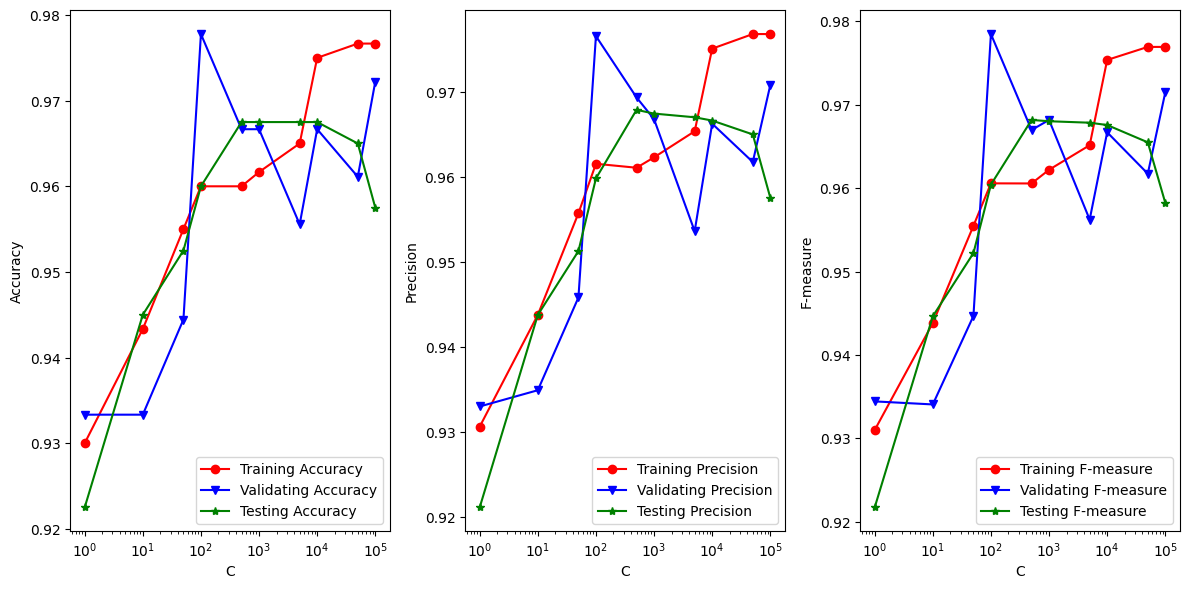

In [1360]:
# Nonlinear SVM Model
C = [1, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

trainAcc, trainPre, trainFm = [], [], []
valAcc, valPre, valFm =  [], [], []
testAcc, testPre, testFm = [], [], []

for param in C:
    # Training the model
    clf = SVC(C=param, kernel='rbf', gamma='auto')
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
    clf = clf.fit(X_train, Y_train)
    # Validate the model on training set
    Y_train_pred = clf.predict(X_train)
    trainAcc.append(accuracy_score(Y_train, Y_train_pred))
    trainPre.append(precision_score(Y_train, Y_train_pred, average='macro'))
    trainFm.append(f1_score(Y_train, Y_train_pred, average='macro'))

    Y_val_pred = clf.predict(X_val)
    valAcc.append(accuracy_score(Y_val, Y_val_pred))
    valPre.append(precision_score(Y_val, Y_val_pred, average='macro'))
    valFm.append(f1_score(Y_val, Y_val_pred, average='macro'))
    # Evaluate the model on the testing set
    Y_test_pred = clf.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_test_pred))
    testPre.append(precision_score(Y_test, Y_test_pred, average='macro'))
    testFm.append(f1_score(Y_test, Y_test_pred, average='macro'))

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.plot(C, trainAcc, 'ro-', C, valAcc, 'bv-' , C, testAcc, 'g*-')
ax1.legend(['Training Accuracy', 'Validating Accuracy', 'Testing Accuracy'])
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')

ax2.plot(C, trainPre, 'ro-', C, valPre, 'bv-', C, testPre, 'g*-')
ax2.legend(['Training Precision', 'Validating Precision', 'Testing Precision'])
ax2.set_xlabel('C')
ax2.set_ylabel('Precision')
ax2.set_xscale('log')

ax3.plot(C, trainFm, 'ro-', C, valFm, 'bv-', C, testFm, 'g*-')
ax3.legend(['Training F-measure', 'Validating F-measure', 'Testing F-measure'])
ax3.set_xlabel('C')
ax3.set_ylabel('F-measure')
ax3.set_xscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# Nonlinear SVM model gives the highest accuracy on the testing compared to other models,
#   around 97%.
# Results on training and validation sets reaches as high as 98%.
# The ideal C to train the data for this case should be around 10^2 to 10^4.
#   Anything below that range is underfitting and over that range is overfitting.

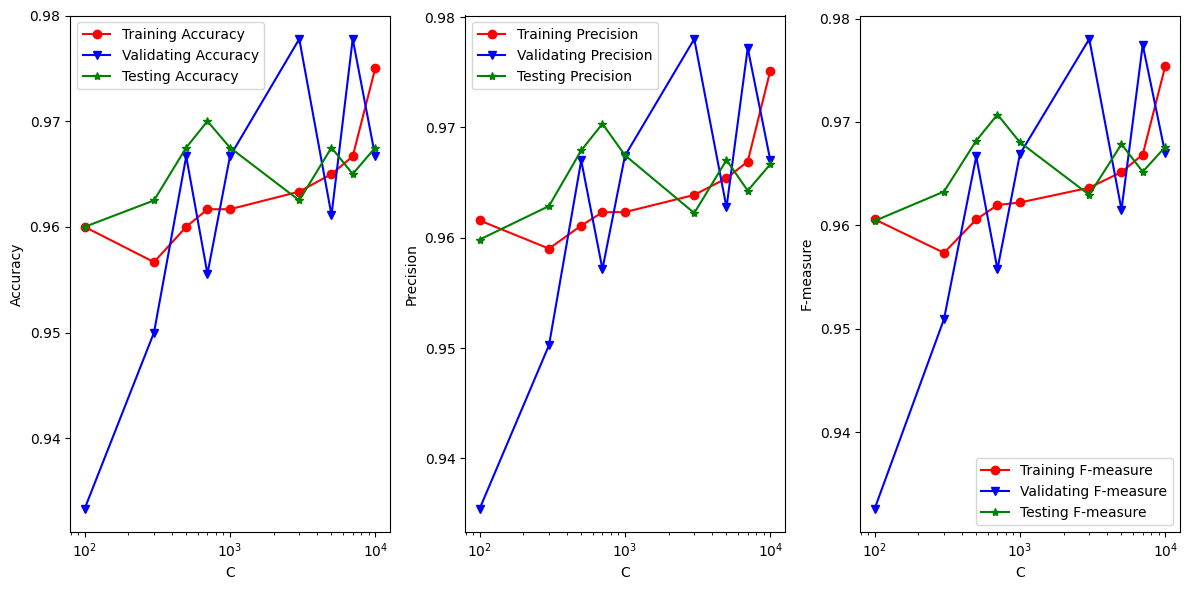

In [1372]:
# Nonlinear SVM Model
C = [100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000]

trainAcc, trainPre, trainFm = [], [], []
valAcc, valPre, valFm =  [], [], []
testAcc, testPre, testFm = [], [], []

for param in C:
    # Training the model
    clf = SVC(C=param, kernel='rbf', gamma='auto')
    X_train_2, X_val, Y_train_2, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
    clf = clf.fit(X_train, Y_train)
    # Validate the model on training set
    Y_train_pred = clf.predict(X_train)
    trainAcc.append(accuracy_score(Y_train, Y_train_pred))
    trainPre.append(precision_score(Y_train, Y_train_pred, average='macro'))
    trainFm.append(f1_score(Y_train, Y_train_pred, average='macro'))

    Y_val_pred = clf.predict(X_val)
    valAcc.append(accuracy_score(Y_val, Y_val_pred))
    valPre.append(precision_score(Y_val, Y_val_pred, average='macro'))
    valFm.append(f1_score(Y_val, Y_val_pred, average='macro'))
    # Evaluate the model on the testing set
    Y_test_pred = clf.predict(X_test)
    testAcc.append(accuracy_score(Y_test, Y_test_pred))
    testPre.append(precision_score(Y_test, Y_test_pred, average='macro'))
    testFm.append(f1_score(Y_test, Y_test_pred, average='macro'))

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.plot(C, trainAcc, 'ro-', C, valAcc, 'bv-' , C, testAcc, 'g*-')
ax1.legend(['Training Accuracy', 'Validating Accuracy', 'Testing Accuracy'])
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')

ax2.plot(C, trainPre, 'ro-', C, valPre, 'bv-', C, testPre, 'g*-')
ax2.legend(['Training Precision', 'Validating Precision', 'Testing Precision'])
ax2.set_xlabel('C')
ax2.set_ylabel('Precision')
ax2.set_xscale('log')

ax3.plot(C, trainFm, 'ro-', C, valFm, 'bv-', C, testFm, 'g*-')
ax3.legend(['Training F-measure', 'Validating F-measure', 'Testing F-measure'])
ax3.set_xlabel('C')
ax3.set_ylabel('F-measure')
ax3.set_xscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# These plots gives closer look to the range we mentioned above (10^2 to 10^4).
# The accuracy on testing set reaches its maximum at around over 97%, at C = 10^3.
#   Then it decreases after that range due to overfitting as expected.